from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import pathlib

In [ ]:
# Data extraction
path_drive = '/content/drive/Shareddrives/ML_Final_Project/op_spam_v1.4'
path = pathlib.Path(path_drive)
file_list_truth = path.rglob("truth*/**/*.txt")
file_list_deceptive = path.rglob("deceptive*/**/*.txt")

reviews_truth = []
reviews_deceptive = []

for file_path in file_list_truth:
    with open(file_path) as f_input:
        reviews_truth.append(("".join(f_input.readlines()), 1))

for file_path in file_list_deceptive:
    with open(file_path) as f_input:
        reviews_deceptive.append(("".join(f_input.readlines()),0))

reviews = reviews_truth + reviews_deceptive

In [ ]:
import pandas as pd
review_df = pd.DataFrame.from_records(data=reviews, columns = ['review', 'labels'])
print(review_df['review'])

0       My wife and I stayed for 2 nights and loved it...
1       After reading some of the most recent reviews ...
2       Stayed here for two days while attending Lollo...
3       I booked this hotel for $75 on Hotwire with mi...
4       My wife and I decided to spend three days in C...
                              ...                        
1595    I will never stay at Conrad Chicago again. The...
1596    If you want a 5-star hotel with 1-star service...
1597    During my recent stay at the Hyatt Regency Chi...
1598    First off, don't get a room on a lower floor, ...
1599    My stay at the Fairmont Chicago Millennium Hot...
Name: review, Length: 1600, dtype: object


<Figure size 800x560 with 0 Axes>

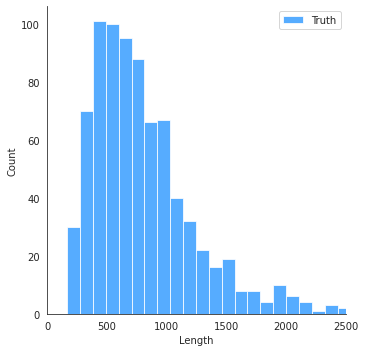

In [ ]:
# review length visualization
review_df['length'] = review_df['review'].apply(lambda x: len(x))

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

x1 = review_df.loc[review_df['labels']==1, 'length']

plt.figure(figsize=(10,7), dpi= 80)
sns.displot(x1, color="dodgerblue", label='Truth')
plt.legend();
plt.xlabel('Length')

plt.xlim(0, 2500)
plt.show()

In [ ]:
review_df.head()

,review,labels,length
0,My wife and I stayed for 2 nights and loved it...,1,1410
1,After reading some of the most recent reviews ...,1,745
2,Stayed here for two days while attending Lollo...,1,386
3,I booked this hotel for $75 on Hotwire with mi...,1,1158
4,My wife and I decided to spend three days in C...,1,522


In [ ]:
"Count number of characters in each review"
review_df['number of char'] = review_df['review'].apply(lambda x: len(x))
review_df.head()

,review,labels,length,number of char
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410
1,After reading some of the most recent reviews ...,1,745,745
2,Stayed here for two days while attending Lollo...,1,386,386
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158
4,My wife and I decided to spend three days in C...,1,522,522


In [ ]:
"Count number of words"
import re
review_df['number of words'] = review_df['review'].apply(lambda x: len(re.findall(r'\w+', x)))
review_df.head()

,review,labels,length,number of char,number of words
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263
1,After reading some of the most recent reviews ...,1,745,745,142
2,Stayed here for two days while attending Lollo...,1,386,386,64
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216
4,My wife and I decided to spend three days in C...,1,522,522,100


In [ ]:
"Remove Numbers"
review_df['review_remove_num'] = review_df['review'].apply(lambda x:re.sub("[0-9]", "", x))
review_df.head()

,review,labels,number of char,number of words,review_remove_num
0,My wife and I stayed for 2 nights and loved it...,1,1410,263,My wife and I stayed for nights and loved it....
1,After reading some of the most recent reviews ...,1,745,142,After reading some of the most recent reviews ...
2,Stayed here for two days while attending Lollo...,1,386,64,Stayed here for two days while attending Lollo...
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,216,I booked this hotel for $ on Hotwire with mid-...
4,My wife and I decided to spend three days in C...,1,522,100,My wife and I decided to spend three days in C...


In [ ]:
"Change to lower case"
review_df['review_lower'] = review_df['review'].apply(lambda x: x.lower())
review_df.head()

,review,labels,number of char,number of words,review_remove_num,review_lower
0,My wife and I stayed for 2 nights and loved it...,1,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...
1,After reading some of the most recent reviews ...,1,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...
2,Stayed here for two days while attending Lollo...,1,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...
4,My wife and I decided to spend three days in C...,1,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...


In [ ]:
"Count number of sentences"
review_df['number of sentence'] = review_df['review'].apply(lambda x: len(re.split(r'[.!?]+', x)))
review_df.head()

,review,labels,number of char,number of words,review_remove_num,review_lower,number of sentence
0,My wife and I stayed for 2 nights and loved it...,1,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16
1,After reading some of the most recent reviews ...,1,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13
2,Stayed here for two days while attending Lollo...,1,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30
4,My wife and I decided to spend three days in C...,1,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7


In [ ]:
"Count average word length in a sentence"
review_df['aver sentence char'] = round(review_df['number of words']/review_df['number of sentence'], 0)
review_df.head()

,review,labels,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char
0,My wife and I stayed for 2 nights and loved it...,1,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0
1,After reading some of the most recent reviews ...,1,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0
2,Stayed here for two days while attending Lollo...,1,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0
4,My wife and I decided to spend three days in C...,1,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0


In [ ]:
"Count number of punctuation"
import string
review_df['number of punctuation'] = review_df['review'].apply(lambda x: len([wd for wd in x if wd in string.punctuation]))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17


In [ ]:
"Count number of stop words"
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words += ["he's", "i'm", "can't", "i've"]
stop_words += ['a', 'about', 'above', 'across', 'after', 'afterwards']
stop_words += ['again', 'against', 'all', 'almost', 'alone', 'along']
stop_words += ['this', 'is', 'your']
review_df['number of stop words'] = review_df['review'].apply(lambda x: len([wd for wd in x if wd in stop_words]))
review_df.head()
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
"Remove stopwprds"
review_df['review_without_stopwords'] = review_df['review_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...


In [ ]:
"Word Stemming"
import re
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = stopwords.words("english")
review_df['review_stem'] = review_df['review_without_stopwords'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop_words]).lower())
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
import string

def lemmatize_sentence(data):
    data = ''.join([i for i in data if i not in string.punctuation or i == '\''])
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    tokens = data.split()
    lemmatized_sentence = []
    lemmatizer = WordNetLemmatizer()
    for token, tag in pos_tag(tokens):
      if '\'' in token:
        continue
      lemmatized_sentence.append(lemmatizer.lemmatize(token, tag_map[tag[0]]))   
    return ' '.join(lemmatized_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
review_df['review_lemmatized'] = review_df['review_without_stopwords'].apply(lambda x: lemmatize_sentence(x))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem,review_lemmatized
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...


In [ ]:
"Bigram"
from nltk.collocations import *
def bigram_finder(data):
  bigram_measures = nltk.collocations.BigramAssocMeasures()
  # finder = BigramCollocationFinder.from_words(nltk.corpus.genesis.words('english-web.txt'))
  tokens = nltk.word_tokenize(data)
  finder = BigramCollocationFinder.from_words(tokens)
  finder.apply_freq_filter(1)
  return finder.nbest(bigram_measures.pmi, 10)  # doctest: +NORMALIZE_WHITESPACE

review_df['review_bigram'] = review_df['review_lemmatized'].apply(lambda x: bigram_finder(x))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem,review_lemmatized,review_bigram
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (..."
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ..."
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (..."
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party..."
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm..."


In [ ]:
vocabulary = list(review_df['review_stem'])
print(vocabulary)
print(len(vocabulary))

['wife stay night love stay book us virgin atlant book flight london chicago quit sure expect reassur hilton brand name event found airlin knew suggest hotel arrriv got warm welcom check quick effici interior hotel spectacular look like refurbish reflect decor would built room given good size queen bed particularli comfort hotel conveni locat restaur nearbi first night ate hotel gourmet restaur lockwood disappoint breakfast also serv restaur buffet morn good valu qualiti offer gener found servic hotel good staff help nice touch check hotel go next destin car book pick us minut late arriv member staff supervis doormen saw us look bit lost came assist us find car arriv overal would thoroughli recommend hotel busi leisur stay qualiti valu money', 'read recent review realli perplex know expect pleasantli surpris past review neg posit state beat locat hotel perfect big spaciou room old tower avoid expens pitfal hotel extra bottl water item room fridg bed great room kept clean staff friendli

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# define a method for data cleaning
def dataClean(resource):
  review_df = pd.DataFrame.from_records(data=resource, columns = ['review', 'labels'])
  review_df['review_lower'] = review_df['review'].apply(lambda x: x.lower()) # change to lowercase
  review_df['review_without_stopwords'] = review_df['review_lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])) # remove stopwords
  review_df['review_stem'] = review_df['review_without_stopwords'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in stop_words]).lower())# stemming
  voc = list(review_df['review_stem'])
  return voc
  #print(review_df)

In [ ]:
# pos tagging, adding feature
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from textblob import TextBlob
def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags

In [ ]:
from textblob import TextBlob
def pos(review_without_stopwords):
    return TextBlob(review_without_stopwords).tags
review_df['review_pos'] = review_df.review_lemmatized.apply(pos)
review_df['pos'] = review_df['review_pos'].map(lambda x:" ".join(["/".join(x) for x in x ]) )
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),..."
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real..."
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB..."
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ..."
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three..."


In [ ]:
review_df['original_review'] = review_df.review_lower.apply(pos)
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos,original_review
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),...","[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (..."
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real...","[(after, IN), (reading, VBG), (some, DT), (of,..."
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB...","[(stayed, VBN), (here, RB), (for, IN), (two, C..."
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ...","[(i, NN), (booked, VBD), (this, DT), (hotel, N..."
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (..."


In [ ]:
def calculate_percent(data, tag):
  word_dict = {}
  total_cnt = 0
  for word in data:
    val = word[1][0:2]
    if val not in word_dict:
      word_dict[val] = 0
    word_dict[val] += 1
    total_cnt += 1
  return word_dict[tag]/total_cnt if tag in word_dict else 0
review_df["percent of nouns"] = review_df["original_review"].apply(lambda x: calculate_percent(x, "NN"))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos,original_review,percent of nouns
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),...","[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",0.212928
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real...","[(after, IN), (reading, VBG), (some, DT), (of,...",0.225352
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB...","[(stayed, VBN), (here, RB), (for, IN), (two, C...",0.301587
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ...","[(i, NN), (booked, VBD), (this, DT), (hotel, N...",0.320574
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...",0.237624


In [ ]:
review_df["percent of verbs"] = review_df["original_review"].apply(lambda x: calculate_percent(x, "VB"))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos,original_review,percent of nouns,percent of verbs
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),...","[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",0.212928,0.220532
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real...","[(after, IN), (reading, VBG), (some, DT), (of,...",0.225352,0.204225
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB...","[(stayed, VBN), (here, RB), (for, IN), (two, C...",0.301587,0.126984
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ...","[(i, NN), (booked, VBD), (this, DT), (hotel, N...",0.320574,0.177033
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...",0.237624,0.188119


In [ ]:
review_df["percent of adjs"] = review_df["original_review"].apply(lambda x: calculate_percent(x, "JJ"))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos,original_review,percent of nouns,percent of verbs,percent of adjs
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),...","[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",0.212928,0.220532,0.076046
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real...","[(after, IN), (reading, VBG), (some, DT), (of,...",0.225352,0.204225,0.126761
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB...","[(stayed, VBN), (here, RB), (for, IN), (two, C...",0.301587,0.126984,0.158730
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ...","[(i, NN), (booked, VBD), (this, DT), (hotel, N...",0.320574,0.177033,0.143541
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...",0.237624,0.188119,0.079208


In [ ]:
review_df["percent of dts"] = review_df["original_review"].apply(lambda x: calculate_percent(x, "DT"))
review_df.head()

,review,labels,length,number of char,number of words,review_remove_num,review_lower,number of sentence,aver sentence char,number of punctuation,number of stop words,review_without_stopwords,review_stem_x,review_lemmatized,review_bigram,review_stem_y,pos,review_pos,original_review,percent of nouns,percent of verbs,percent of adjs,percent of dts
0,My wife and I stayed for 2 nights and loved it...,1,1410,1410,263,My wife and I stayed for nights and loved it....,my wife and i stayed for 2 nights and loved it...,16,16.0,18,482,wife stayed 2 nights loved it. stay booked us ...,wife stay night love stay book us virgin atlan...,wife stay 2 night love it stay book u virgin a...,"[(1, queen), (airline, knew), (also, serve), (...","[(wife, NN), (stay, VB), (night, NN), (love, V...",wife/NN stay/VB 2/CD night/NN love/NN it/PRP s...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),...","[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",0.212928,0.220532,0.076046,0.133080
1,After reading some of the most recent reviews ...,1,745,745,142,After reading some of the most recent reviews ...,after reading some of the most recent reviews ...,13,11.0,26,267,reading recent reviews really perplexed. know ...,read recent review realli perplex know expect ...,read recent review really perplex know expect ...,"[(avoid, expensive), (beat, location), (believ...","[(read, JJ), (recent, JJ), (review, NN), (real...",read/JJ recent/JJ review/NN really/RB perplex/...,"[(read, JJ), (recent, JJ), (review, NN), (real...","[(after, IN), (reading, VBG), (some, DT), (of,...",0.225352,0.204225,0.126761,0.140845
2,Stayed here for two days while attending Lollo...,1,386,386,64,Stayed here for two days while attending Lollo...,stayed here for two days while attending lollo...,7,9.0,11,140,stayed two days attending lollopalooza music f...,stay two day attend lollopalooza music festiv ...,stay two day attend lollopalooza music festiva...,"[(attend, lollopalooza), (attraction, king), (...","[(stay, JJ), (two, CD), (day, NN), (attend, VB...",stay/JJ two/CD day/NN attend/VB lollopalooza/J...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB...","[(stayed, VBN), (here, RB), (for, IN), (two, C...",0.301587,0.126984,0.158730,0.095238
3,I booked this hotel for $75 on Hotwire with mi...,1,1158,1158,216,I booked this hotel for $ on Hotwire with mid-...,i booked this hotel for $75 on hotwire with mi...,30,7.0,43,412,booked hotel $75 hotwire mid-level expectation...,book hotel hotwir mid level expect one night t...,book hotel 75 hotwire midlevel expectation one...,"[(1045, pm), (12, hour), (2, bed), (3rd, party...","[(book, NN), (hotel, NN), (hotwir, NN), (mid, ...",book/NN hotel/NN 75/CD hotwire/NN midlevel/NN ...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ...","[(i, NN), (booked, VBD), (this, DT), (hotel, N...",0.320574,0.177033,0.143541,0.052632
4,My wife and I decided to spend three days in C...,1,522,522,100,My wife and I decided to spend three days in C...,my wife and i decided to spend three days in c...,7,14.0,17,179,wife decided spend three days chicago last sum...,wife decid spend three day chicago last summer...,wife decide spend three day chicago last summe...,"[(able, get), (affraid, stay), (anywhere, palm...","[(wife, NN), (decid, NNS), (spend, VBP), (thre...",wife/NN decide/VB spend/JJ three/CD day/NN chi...,"[(wife, NN), (decide, VB), (spend, JJ), (three...","[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...",0.237624,0.188119,0.079208,0.099010


In [ ]:
pos_df = review_df[["review", "original_review", "review_lemmatized", "review_pos"]]
pos_df.head(10)

,review,original_review,review_lemmatized,review_pos
0,My wife and I stayed for 2 nights and loved it...,"[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",wife stay 2 night love it stay book u virgin a...,"[(wife, NN), (stay, VB), (2, CD), (night, NN),..."
1,After reading some of the most recent reviews ...,"[(after, IN), (reading, VBG), (some, DT), (of,...",read recent review really perplex know expect ...,"[(read, JJ), (recent, JJ), (review, NN), (real..."
2,Stayed here for two days while attending Lollo...,"[(stayed, VBN), (here, RB), (for, IN), (two, C...",stay two day attend lollopalooza music festiva...,"[(stay, JJ), (two, CD), (day, NN), (attend, VB..."
3,I booked this hotel for $75 on Hotwire with mi...,"[(i, NN), (booked, VBD), (this, DT), (hotel, N...",book hotel 75 hotwire midlevel expectation one...,"[(book, NN), (hotel, NN), (75, CD), (hotwire, ..."
4,My wife and I decided to spend three days in C...,"[(my, PRP$), (wife, NN), (and, CC), (i, NN), (...",wife decide spend three day chicago last summe...,"[(wife, NN), (decide, VB), (spend, JJ), (three..."
5,Spent a wonderful night at the Amalfi with fri...,"[(spent, NN), (a, DT), (wonderful, JJ), (night...",spent wonderful night amalfi friends even rece...,"[(spent, NN), (wonderful, JJ), (night, NN), (a..."
6,"I am a fan of Kimpton Hotels, however I have n...","[(i, NN), (am, VBP), (a, DT), (fan, NN), (of, ...",fan kimpton hotel however never experience top...,"[(fan, JJ), (kimpton, NNP), (hotel, NN), (howe..."
7,My wife and I spent several nights here on a g...,"[(my, PRP$), (wife, NN), (and, CC), (i, JJ), (...",wife spend several night getaway excursion cho...,"[(wife, NN), (spend, VB), (several, JJ), (nigh..."
8,"Guys trip to Chicago, scored this hotel on Pri...","[(guys, NNS), (trip, NN), (to, TO), (chicago, ...",guy trip chicago score hotel priceline 100 nig...,"[(guy, NN), (trip, NN), (chicago, NN), (score,..."
9,beautiful place with European charm. No compla...,"[(beautiful, JJ), (place, NN), (with, IN), (eu...",beautiful place european charm complaint great...,"[(beautiful, JJ), (place, NN), (european, JJ),..."


In [207]:
n_df = review_df[["labels", "number of char", "number of words", "number of sentence", "aver sentence char", "number of punctuation", "number of stop words", "percent of nouns", "percent of verbs", "percent of adjs", "percent of dts"]]
n_df.head(10)

,labels,number of char,number of words,number of sentence,aver sentence char,number of punctuation,number of stop words,percent of nouns,percent of verbs,percent of adjs,percent of dts
0,1,1410,263,16,16.0,18,482,0.212928,0.220532,0.076046,0.133080
1,1,745,142,13,11.0,26,267,0.225352,0.204225,0.126761,0.140845
2,1,386,64,7,9.0,11,140,0.301587,0.126984,0.158730,0.095238
3,1,1158,216,30,7.0,43,412,0.320574,0.177033,0.143541,0.052632
4,1,522,100,7,14.0,17,179,0.237624,0.188119,0.079208,0.099010
5,1,214,38,5,8.0,5,73,0.236842,0.157895,0.157895,0.131579
6,1,923,177,11,16.0,28,321,0.310345,0.172414,0.080460,0.132184
7,1,481,93,11,8.0,24,158,0.236559,0.150538,0.150538,0.075269
8,1,659,124,10,12.0,17,251,0.266129,0.161290,0.104839,0.120968
9,1,283,45,7,6.0,20,94,0.377778,0.066667,0.200000,0.088889


In [208]:
corr_matrix = n_df.corr()
corr_matrix["labels"].sort_values(ascending=False)

labels                   1.000000
number of punctuation    0.194212
number of sentence       0.122046
percent of dts           0.073069
percent of nouns         0.071317
percent of adjs          0.068208
number of char           0.031307
number of words          0.025562
number of stop words     0.013696
aver sentence char      -0.072006
percent of verbs        -0.149043
Name: labels, dtype: float64

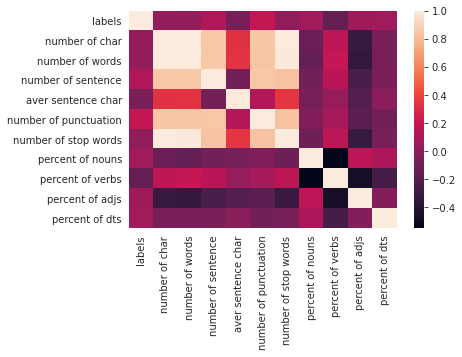

In [209]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [210]:
list_total_reviews = dataClean(reviews)
list_truth_reviews = dataClean(reviews_truth)
list_deceptive_reviews = dataClean(reviews_deceptive)

# Train/test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
review_train, review_test, label_train, label_test = train_test_split(review_df['pos'],review_df['labels'], test_size=0.2,random_state=13)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(lowercase = True, use_idf=True, smooth_idf=True, sublinear_tf=False)

X_train_tf = tf_vect.fit_transform(review_train)
X_test_tf = tf_vect.transform(review_test)


In [ ]:
print(X_train_tf)

# Machine Learning Models

# KNN

In [ ]:
# train data with KNN, and check train time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time 

start = time.perf_counter() 

clf = KNeighborsClassifier(44)
clf.fit(X_train_tf, label_train)
y_pred_NN = clf.predict(X_test_tf)
end = time.perf_counter() 
print(accuracy_score(label_test, y_pred_NN, normalize=True))

print(end - start)

0.809375
0.0535526209996533


In [ ]:
# Get the K value with the highest accuracy score
import matplotlib.pyplot as plt
acc = []

from sklearn import metrics
for i in range(1,200):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_tf,label_train)
    yhat = neigh.predict(X_test_tf)
    acc.append(metrics.accuracy_score(label_test, yhat, normalize=True))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,200),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
# KNN Metrics
# classification_report
from sklearn.metrics import classification_report

print(classification_report(label_test, y_pred_NN, labels=[1, 0]))

In [ ]:
# KNN Metrics: confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(label_test, y_pred_NN, labels=[1, 0])

In [ ]:
# 10-fold cross validation for KNN model
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(clf, X_train_tf, label_train, cv=10)
print(knn_scores)

[0.75      0.7578125 0.7734375 0.703125  0.796875  0.7734375 0.78125
 0.7265625 0.7578125 0.7734375]


In [ ]:
max_value = max(knn_scores)
min_value = min(knn_scores)
avg_value = 0 if len(knn_scores) == 0 else sum(knn_scores)/len(knn_scores)
print(f'max value is {max_value}, min value is {min_value} and average is {avg_value}')


max value is 0.796875, min value is 0.703125 and average is 0.759375


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_tf, label_train)
y_pred_log = log_reg.predict(X_test_tf)
print(accuracy_score(label_test, y_pred_log, normalize=True))

0.890625


In [ ]:
log_scores = cross_val_score(log_reg, X_train_tf, label_train, cv=10)
print(log_scores)
df_per = pd.DataFrame(log_scores)
df_per.columns =['Accuracy Score']
df_per.head(10)

[0.8671875 0.9140625 0.8671875 0.84375   0.84375   0.8515625 0.8671875
 0.84375   0.8671875 0.828125 ]


,Accuracy Score
0,0.867188
1,0.914062
2,0.867188
3,0.843750
4,0.843750
5,0.851562
6,0.867188
7,0.843750
8,0.867188
9,0.828125


In [ ]:
max_value = max(log_scores)
min_value = min(log_scores)
avg_value = 0 if len(per_scores) == 0 else sum(log_scores)/len(log_scores)
print(f'max value is {max_value}, min value is {min_value} and average is {avg_value}')

max value is 0.9140625, min value is 0.828125 and average is 0.859375


In [ ]:
confusion_matrix(label_test, y_pred_log, labels=[1, 0])

array([[139,  15],
       [ 20, 146]])

In [ ]:
print(classification_report(label_test, y_pred_NN, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89       154
           0       0.91      0.88      0.90       166

    accuracy                           0.89       320
   macro avg       0.89      0.89      0.89       320
weighted avg       0.89      0.89      0.89       320



#Preceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X_train_tf, label_train)
y_pred_per = per_clf.predict(X_test_tf)
print(accuracy_score(label_test, y_pred_per, normalize=True))

0.89375


In [ ]:
print(accuracy_score(label_test, y_pred_per, normalize=True))

0.89375


In [ ]:
per_scores = cross_val_score(per_clf, X_train_tf, label_train, cv=10)
df_per = pd.DataFrame(per_scores)
df_per.columns =['Accuracy Score']
df_per.head(10)

,Accuracy Score
0,0.867188
1,0.890625
2,0.843750
3,0.843750
4,0.867188
5,0.867188
6,0.851562
7,0.835938
8,0.828125
9,0.843750


In [ ]:
max_value = max(per_scores)
min_value = min(per_scores)
avg_value = 0 if len(per_scores) == 0 else sum(per_scores)/len(per_scores)
print(f'max value is {max_value}, min value is {min_value} and average is {avg_value}')

max value is 0.890625, min value is 0.828125 and average is 0.85390625


In [ ]:
print(classification_report(label_test, y_pred_per, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89       154
           0       0.91      0.88      0.90       166

    accuracy                           0.89       320
   macro avg       0.89      0.89      0.89       320
weighted avg       0.89      0.89      0.89       320



In [ ]:
confusion_matrix(label_test, y_pred_per, labels=[1, 0])

array([[140,  14],
       [ 20, 146]])

# SVM

In [ ]:
from sklearn import svm

In [ ]:
start = time.perf_counter()
svc_clf = svm.SVC()
svc_clf.fit(X_train_tf, label_train)
y_pred_svc = per_clf.predict(X_test_tf)
end = time.perf_counter() 
print(end - start)

1.14577903800091


In [ ]:
print(accuracy_score(label_test, y_pred_svc, normalize=True))

0.89375


In [ ]:
svc_scores = cross_val_score(svc_clf, X_train_tf, label_train, cv=10)
df_per = pd.DataFrame(svc_scores)
df_per.columns =['Accuracy Score']
df_per.head(10)

,Accuracy Score
0,0.875000
1,0.914062
2,0.875000
3,0.867188
4,0.875000
5,0.867188
6,0.890625
7,0.835938
8,0.875000
9,0.843750


In [ ]:
max_value = max(svc_scores)
min_value = min(svc_scores)
avg_value = 0 if len(svc_scores) == 0 else sum(svc_scores)/len(svc_scores)
print(f'max value is {max_value}, min value is {min_value} and average is {avg_value}')

max value is 0.9140625, min value is 0.8359375 and average is 0.871875


In [ ]:
confusion_matrix(label_test, y_pred_svc, labels=[1, 0])

array([[140,  14],
       [ 20, 146]])

# Random Forest

In [ ]:
# train data for Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=3)
rfc.fit(X_train_tf, label_train)
print(rfc.score(X_test_tf, label_test)

SyntaxError: ignored

In [ ]:
# 10-fold cross validation for Random Forest model

from sklearn.model_selection import cross_val_score

rfc_scores = cross_val_score(rfc, X_train_tf, label_train, cv=10)
print(rfc_scores)

In [ ]:
# grid search for random forest hyperparameter

from sklearn.model_selection import GridSearchCV
param_grid = [
    {
      'n_estimators': [10, 50, 100, 200, 500, 1000], 
      'max_features': ['auto', 'sqrt'],
      'bootstrap': [False, True]
    }
  ]
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train_tf, label_train)

print('Best accuracy:' , grid_search.best_score_)
print('Best parameters:' , grid_search.best_params_)

In [ ]:
# confusion matrix for Random Forest

from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_test_tf)

print(confusion_matrix(label_test, y_pred))


In [ ]:
# classification report for Random Forest

print(classification_report(label_test, y_pred))

# Statistics and Visualization

In [ ]:
# data processing
from sklearn.feature_extraction.text import TfidfVectorizer
from operator import itemgetter

def dataProcess(list):
  vectorizer = TfidfVectorizer()
  vectorizer_fit = vectorizer.fit_transform(list)

  word_list = vectorizer.get_feature_names()
  count_list = vectorizer_fit.toarray().sum(axis=0)

  dict = {word_list[i]: count_list[i] for i in range(len(word_list))}

  return dict

In [ ]:
dic_total_reviews = dataProcess(list_total_reviews)
dic_truth_reviews = dataProcess(list_truth_reviews)
dic_deceptive_reviews = dataProcess(list_deceptive_reviews)

# Data Visualization

In [ ]:
def dataVisual(dic, number):
  T_vocabulary_distr = nltk.FreqDist(dic)
  all_fdist = T_vocabulary_distr.most_common(number)
  print(all_fdist)
  pd_fdist = pd.DataFrame(all_fdist, columns=['Word', 'Frequency']).set_index('Word')
  #print(df_fdist)

  pd_fdist.plot(kind = 'bar', colormap = 'Paired', stacked=True)

In [ ]:
dataVisual(dic_total_reviews, 30)
dataVisual(dic_truth_reviews, 30)
dataVisual(dic_deceptive_reviews, 30)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter 

count_vectorizer = CountVectorizer()
count_vectorizer_fit = count_vectorizer.fit_transform(vocabulary)
word_list = count_vectorizer.get_feature_names()
count_list = count_vectorizer_fit.toarray().sum(axis=0)
print(word_list)
print(count_list)

word_count_dic = zip(word_list, count_list)
print(zip(word_list, count_list))

dict = {word_list[i]: count_list[i] for i in range(len(word_list))}
sorted_dict = sorted(dict.items(), key = itemgetter(1), reverse = True)

for key, value in sorted_dict:
    print(key, value)


In [ ]:
vocabulary_distr = nltk.FreqDist(dic_total_reviews)
vocabulary_distr.most_common(30)
vocabulary_distr.plot(30)

In [ ]:
plt.hist(count_vectorizer.vocabulary_)
plt.plot()

In [ ]:
# wordcloud
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def dataWordCloud(dic):
  dictionary = Counter(dic)
  cloud = WordCloud(max_font_size=80,colormap='Pastel1').generate_from_frequencies(dictionary)
  plt.figure(figsize=(16,12))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


In [ ]:
dataWordCloud(dic_total_reviews)
dataWordCloud(dic_truth_reviews)
dataWordCloud(dic_deceptive_reviews)

In [ ]:
def word_frequency(data):
  data_cleaned = ''.join(data)
  data_cleaned = data_cleaned.split(" ")
  uniqueWords = set(data_cleaned)
  word_dict = dict.fromkeys(uniqueWords, 0)
  for word in data_cleaned:
    word_dict[word] += 1
  sorted_tuple = sorted(word_dict.items(), key=lambda x : x[1], reverse=True)
  return sorted_tuple

In [ ]:
truthful_tuple = word_frequency(truthful_data)
deceptive_tuple = word_frequency(deceptive_data)
print(truthful_tuple[:10])
print(deceptive_tuple[:10])
print(truthful_tuple[7:17])
print(deceptive_tuple[7:17])

In [ ]:
def scatter_graph(data):
  x = []
  y = []
  for val in data[:50]:
    x.append(val[0])
    y.append(val[1])
  plt.figure(figsize=(15, 5), dpi=80)
  plt.scatter(x,y,c=y)
  plt.xticks(rotation=60)
  plt.show()

In [ ]:
scatter_graph(truthful_tuple)
scatter_graph(deceptive_tuple)